In [1]:
import ee 
import geopandas as gpd
import pandas as pd
import geemap
import importlib
import rasterio

c:\Users\vacha\miniconda3\envs\geo\lib\site-packages\google\api_core\_python_version_support.py:266: FutureWarning: You are using a Python version (3.10.19) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)


In [27]:
import pipelines
importlib.reload(pipelines)
ee.Initialize()

In [71]:
debug = 52

In [13]:
pipelines.trainingStart("2020-01-01", "2022-01-01", 500, 60, debug = debug)

In [69]:
pipelines.trainingComplete(250, debug = debug, k = 6)

PRUNING CLUSTER 3 -> FLIPPED TO SAFE
PRUNING CLUSTER 5 -> FLIPPED TO SAFE


c:\Users\vacha\miniconda3\envs\geo\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
pipelines.monitoringStart("2021-01-01", "2023-01-01", 250, 60, debug = debug)  

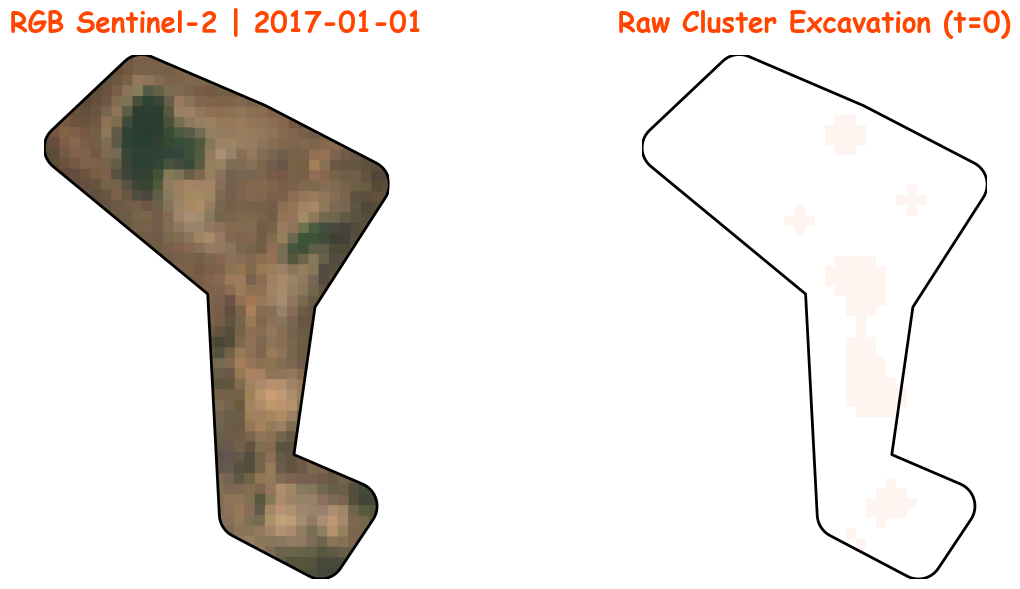

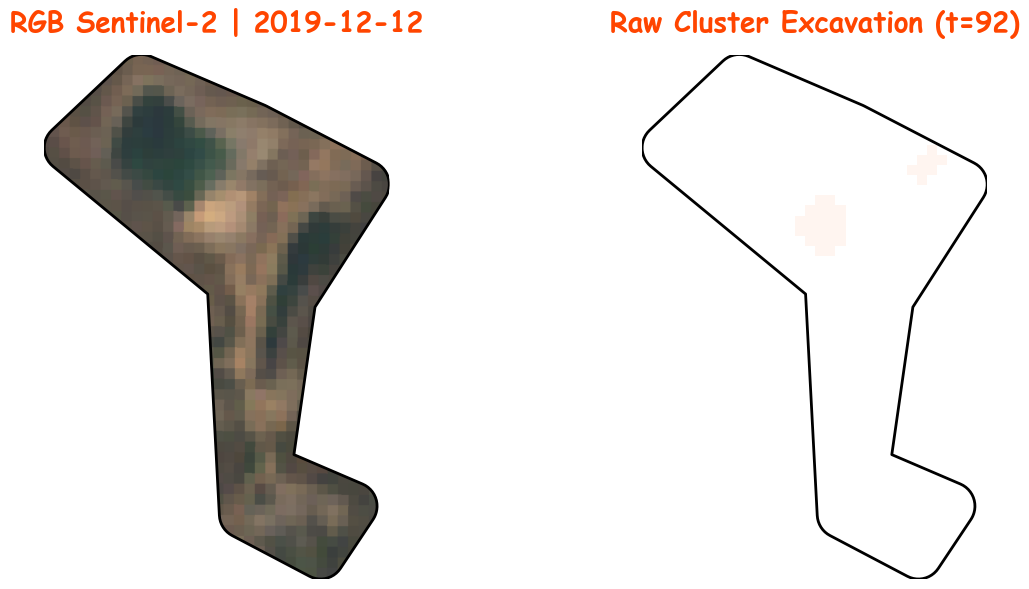

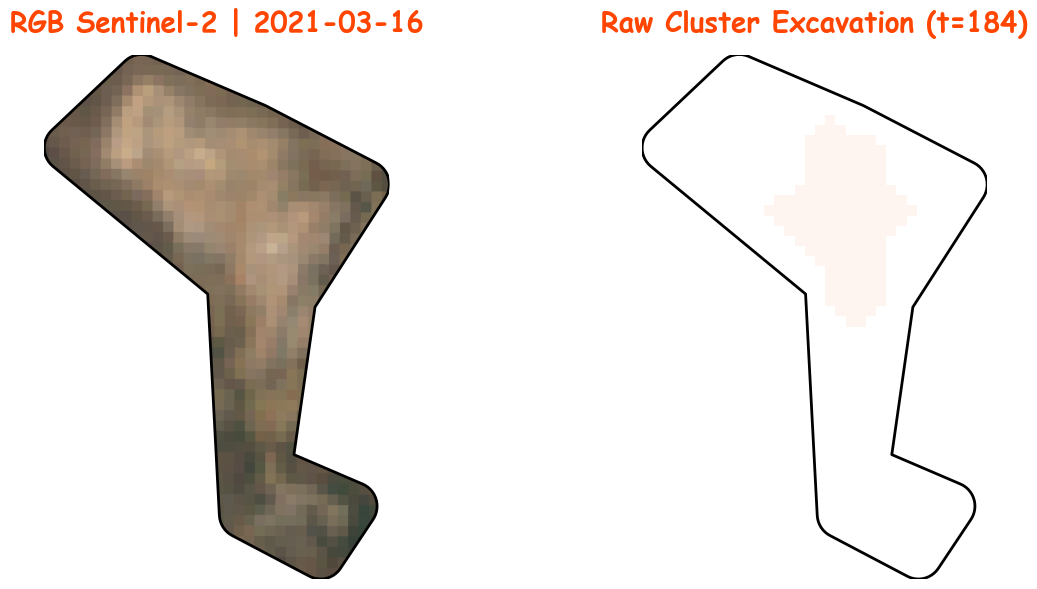

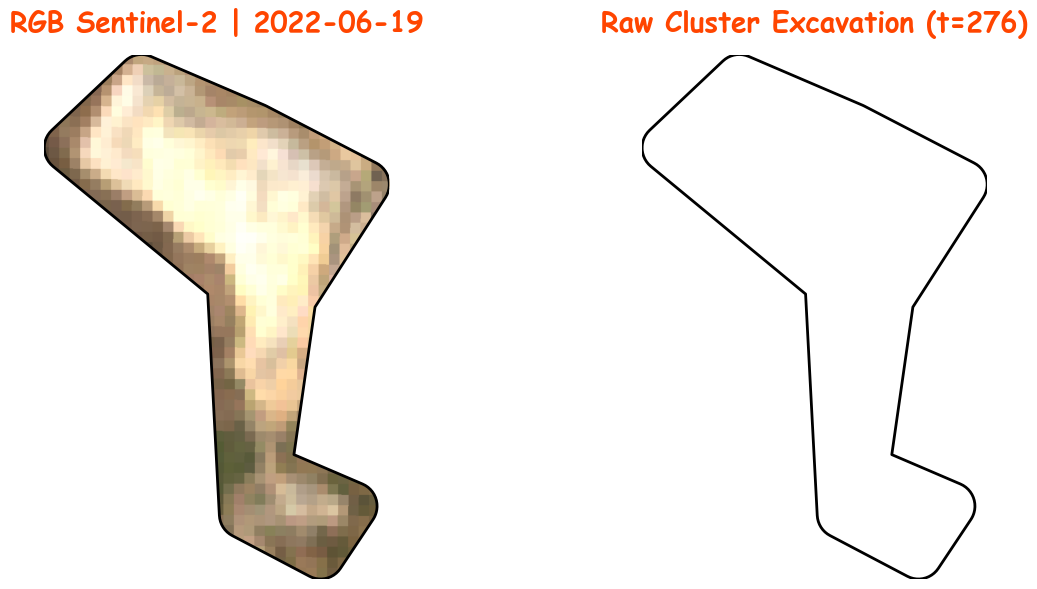

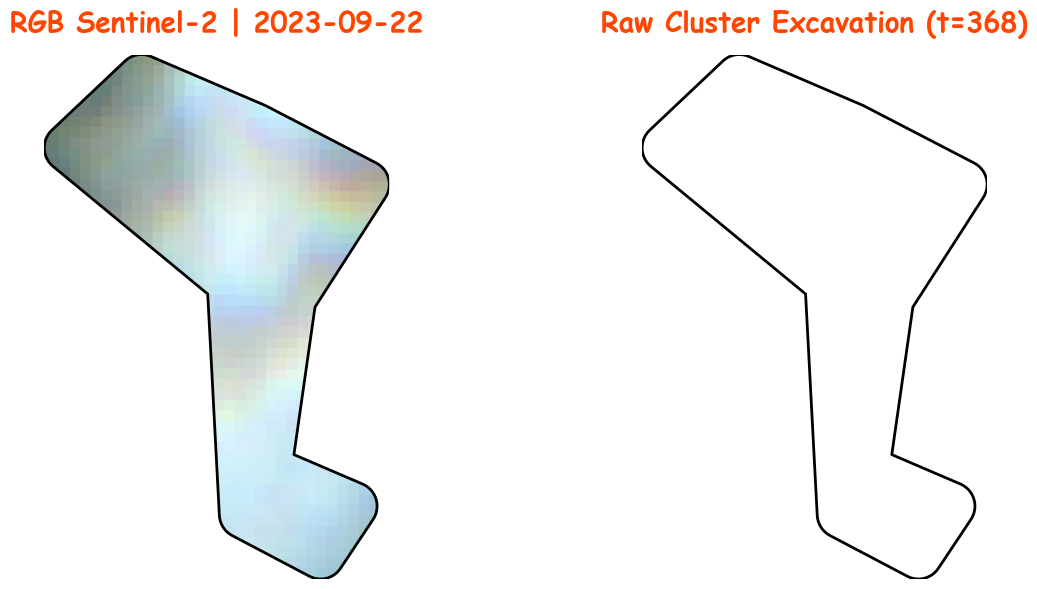

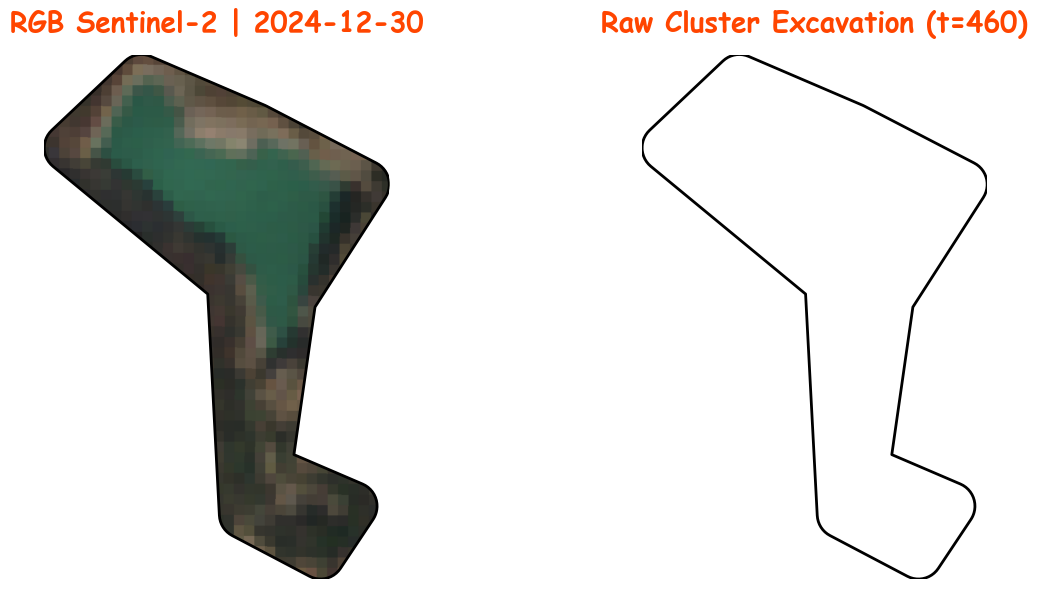

In [ ]:
pipelines.monitoringComplete(250, 60, debug = [51, 52, 53])

In [11]:
df.head(10)

NameError: name 'df' is not defined

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72897 entries, 0 to 72896
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  72897 non-null  object 
 1   B11           72897 non-null  int64  
 2   B11_median    72897 non-null  float64
 3   B12           72897 non-null  int64  
 4   B12_median    72897 non-null  float64
 5   BSI_median    72897 non-null  float64
 6   NBR_slope     72897 non-null  float64
 7   NDVI          72897 non-null  float64
 8   NDVI_median   72897 non-null  float64
 9   NDVI_var      72897 non-null  float64
 10  .geo          72897 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 6.1+ MB


In [ ]:
#pipelines.monitoringStart("2021-01-01", "2021-07-01", 0, 60)   

In [17]:
path = "./Mine Data/Mine_0_Data/mine_0_excavation.tif"
with rasterio.open(path) as src:
    print(src)

<open DatasetReader name='./Mine Data/Mine_0_Data/mine_0_excavation.tif' mode='r'>


In [18]:
with rasterio.open(path) as src:
    print("Driver:", src.driver)
    print("Width:", src.width)
    print("Height:", src.height)
    print("Bands:", src.count)
    print("CRS:", src.crs)
    print("Transform:", src.transform)
    print("Dtype:", src.dtypes)
    E = src.read()
    bandNames = src.descriptions
    bandCount = src.count


Driver: GTiff
Width: 37
Height: 41
Bands: 76
CRS: EPSG:32644
Transform: | 10.00, 0.00, 541200.00|
| 0.00,-10.00, 2696450.00|
| 0.00, 0.00, 1.00|
Dtype: ('uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8')


In [19]:
bandNames

('20210103T051221_20210103T051217_T44QNM_remapped',
 '20210103T051221_20210103T051217_T44RNN_remapped',
 '20210108T051209_20210108T051400_T44QNM_remapped',
 '20210108T051209_20210108T051400_T44RNN_remapped',
 '20210113T051151_20210113T052112_T44QNM_remapped',
 '20210113T051151_20210113T052112_T44RNN_remapped',
 '20210118T051149_20210118T051925_T44QNM_remapped',
 '20210118T051149_20210118T051925_T44RNN_remapped',
 '20210123T051121_20210123T051116_T44QNM_remapped',
 '20210123T051121_20210123T051116_T44RNN_remapped',
 '20210128T051049_20210128T051756_T44QNM_remapped',
 '20210128T051049_20210128T051756_T44RNN_remapped',
 '20210202T051031_20210202T051025_T44QNM_remapped',
 '20210202T051031_20210202T051025_T44RNN_remapped',
 '20210202T051031_20210202T052158_T44QNM_remapped',
 '20210202T051031_20210202T052158_T44RNN_remapped',
 '20210207T050959_20210207T051907_T44QNM_remapped',
 '20210207T050959_20210207T051907_T44RNN_remapped',
 '20210212T050931_20210212T051356_T44QNM_remapped',
 '20210212T0

In [20]:
e, dates = pipelines.retrieveDates(bandNames, E)
dates

[datetime.date(2021, 1, 3),
 datetime.date(2021, 1, 8),
 datetime.date(2021, 1, 13),
 datetime.date(2021, 1, 18),
 datetime.date(2021, 1, 23),
 datetime.date(2021, 1, 28),
 datetime.date(2021, 2, 2),
 datetime.date(2021, 2, 7),
 datetime.date(2021, 2, 12),
 datetime.date(2021, 2, 17),
 datetime.date(2021, 2, 22),
 datetime.date(2021, 2, 27),
 datetime.date(2021, 3, 4),
 datetime.date(2021, 3, 9),
 datetime.date(2021, 3, 14),
 datetime.date(2021, 3, 19),
 datetime.date(2021, 3, 24),
 datetime.date(2021, 3, 29),
 datetime.date(2021, 4, 3),
 datetime.date(2021, 4, 8),
 datetime.date(2021, 4, 13),
 datetime.date(2021, 4, 18),
 datetime.date(2021, 4, 23),
 datetime.date(2021, 4, 28),
 datetime.date(2021, 5, 3),
 datetime.date(2021, 5, 8),
 datetime.date(2021, 5, 13),
 datetime.date(2021, 5, 18),
 datetime.date(2021, 5, 23),
 datetime.date(2021, 5, 28),
 datetime.date(2021, 6, 2),
 datetime.date(2021, 6, 7),
 datetime.date(2021, 6, 12),
 datetime.date(2021, 6, 17),
 datetime.date(2021, 6, 22

In [149]:
df = pd.read_csv("./Mine Data/Mine_1_Data/mine_1_features_7.csv")
df["NDVI_var"].describe()

count    1.943010e+05
mean     5.486258e-03
std      7.959148e-03
min      1.250014e-12
25%      9.780003e-04
50%      2.717594e-03
75%      6.741643e-03
max      1.070573e-01
Name: NDVI_var, dtype: float64

In [150]:
import numpy as np
iqr = np.percentile(df["NDVI_var"], 75) - np.percentile(df["NDVI_var"], 25)
print(iqr)

0.00576364250475901


In [8]:
testdf = pipelines.gdf.sort_values("area", ascending = True).reset_index()
testdf

,index,mine_id,area,perimeter,geometry
0,216,216,0.00,0.21,"POLYGON ((79.76341 23.11658, 79.76341 23.11658..."
1,8,8,0.01,0.44,"POLYGON ((82.36629 23.13023, 82.36626 23.13022..."
2,431,431,0.01,0.36,"POLYGON ((79.72392 21.47261, 79.72314 21.47258..."
3,403,403,0.01,0.27,"POLYGON ((78.95069 21.49908, 78.95071 21.49908..."
4,411,411,0.01,0.41,"POLYGON ((80.96952 21.34003, 80.96949 21.34003..."
...,...,...,...,...,...
501,160,160,22.63,26.69,"POLYGON ((82.98035 23.23656, 82.98036 23.23656..."
502,336,336,22.76,32.11,"POLYGON ((82.6776 24.10615, 82.67793 24.10607,..."
503,338,338,43.01,47.43,"POLYGON ((82.55873 22.3968, 82.55879 22.39673,..."
504,287,287,58.83,56.87,"POLYGON ((79.03861 20.12413, 79.03861 20.12413..."


In [8]:
testdf.head(50)

,index,mine_id,area,perimeter,geometry
0,216,216,0.00,0.21,"POLYGON ((79.76341 23.11658, 79.76341 23.11658..."
1,8,8,0.01,0.44,"POLYGON ((82.36629 23.13023, 82.36626 23.13022..."
2,431,431,0.01,0.36,"POLYGON ((79.72392 21.47261, 79.72314 21.47258..."
3,403,403,0.01,0.27,"POLYGON ((78.95069 21.49908, 78.95071 21.49908..."
4,411,411,0.01,0.41,"POLYGON ((80.96952 21.34003, 80.96949 21.34003..."
5,25,25,0.01,0.41,"POLYGON ((79.90593 20.09501, 79.9059 20.09501,..."
6,427,427,0.01,0.30,"POLYGON ((79.75725 23.11784, 79.75741 23.11775..."
7,432,432,0.01,0.46,"POLYGON ((79.55726 21.62959, 79.55726 21.62959..."
8,423,423,0.01,0.32,"POLYGON ((79.30768 21.52453, 79.30768 21.52453..."
9,425,425,0.01,0.31,"POLYGON ((79.78016 23.12785, 79.78017 23.12785..."


In [11]:
pipelines.gdf[pipelines.gdf["mine_id"] == 500]

,mine_id,area,perimeter,geometry
500,500,0.09,1.34,"POLYGON ((78.05995 24.03508, 78.05931 24.0341,..."
